In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.pyplot import plot as plt
from matplotlib.colors import ListedColormap

In [2]:
df_raw = pd.read_csv('./KaDo.csv')

In [3]:
df_raw.columns

Index(['TICKET_ID', 'MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE',
       'LIBELLE', 'CLI_ID'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = df_raw.copy()

In [6]:
df = df.filter(['MOIS_VENTE', 'PRIX_NET', 'CLI_ID'])

In [7]:
df["NB_T"] = 1

In [8]:
df.columns

Index(['MOIS_VENTE', 'PRIX_NET', 'CLI_ID', 'NB_T'], dtype='object')

In [9]:
df.head()

,MOIS_VENTE,PRIX_NET,CLI_ID,NB_T
0,10,1.67,1490281,1
1,10,1.66,1490281,1
2,10,7.45,1490281,1
3,10,5.95,1490281,1
4,10,1.67,1490281,1


In [10]:
 cart_df = df.groupby(["MOIS_VENTE", "CLI_ID"], as_index=True).sum()

In [11]:
cart_df.head()

PRIX_NET  NB_T
MOIS_VENTE CLI_ID                  
1          20163348      7.45     1
           20200041      6.70     2
           20727324     13.25     5
           21046542     11.30     4
           21239163     12.65     5

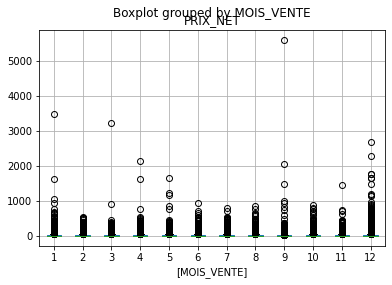

In [12]:
import matplotlib.pyplot as pplt
axes = pd.DataFrame(cart_df["PRIX_NET"]).boxplot(by="MOIS_VENTE", return_type='axes')

In [13]:
cart_df.groupby("MOIS_VENTE")["PRIX_NET", "NB_T"].head()


<ipython-input-13-481fc4c84e6d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cart_df.groupby("MOIS_VENTE")["PRIX_NET", "NB_T"].head()


PRIX_NET  NB_T
MOIS_VENTE CLI_ID                   
1          20163348       7.45     1
           20200041       6.70     2
           20727324      13.25     5
           21046542      11.30     4
           21239163      12.65     5
2          21046542      38.90     6
           21504227       1.95     1
           69813934       6.45     1
           85841284       9.80     2
           195207210      8.45     3
3          20561854       7.05     3
           69813934      21.35     5
           90822328      42.80     4
           131204016      2.95     1
           195207210     17.00     3
4          21497331      33.35     4
           69813934       3.45     1
           195207210     14.00     1
           242424645      5.00     3
           275493987      9.40     2
5          20791601      23.80     4
           21514622      17.90     2
           69813934       3.75     2
           85841284      19.85     4
           100064590     17.85     3
6          21046542      37.55     6
           69813934      23.35     8
           85057203      13.75     2
           85841284      17.65     5
           90822328      12.55     4
7          21046542      78.45    16
           69813934       9.45     4
           85841284      20.45     2
           100064590     29.70     6
           131204016      3.00     1
8          69813934       9.35     4
           85057203       9.75     1
           169985247     46.75     8
           195207210      4.50     2
           206111880      1.50     1
9          13290776      18.50     2
           69813934       1.95     1
           169985247     67.60     6
           206111880      2.25     1
           243624087      8.95     2
10         1490281       18.40     5
           69813934      18.00     1
           85841284      56.95     4
           126716008     26.50     1
           275493987     29.90     1
11         71891681      19.85     3
           169985247     41.00    11
           195207210     14.40     3
           321933797     11.95     1
           356832238     10.90     2
12         13290776      37.00     7
           69813934       5.75     3
           71891681      24.40    12
           85841284       7.95     1
           100064590     41.05    16

In [14]:
cart_df.tail()


PRIX_NET  NB_T
MOIS_VENTE CLI_ID                   
12         997048563      6.95     2
           997048597    255.90    51
           997048729      7.80     4
           997048769      3.95     1
           997385337     23.80     3

In [15]:
import matplotlib.pyplot as pplt


In [16]:
color_map = pplt.get_cmap('inferno') 
reversed_color_map = color_map.reversed()

In [17]:
cart_df_reset_index = cart_df.reset_index()
cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == 12].head()

,MOIS_VENTE,CLI_ID,PRIX_NET,NB_T
2046371,12,13290776,37.00,7
2046372,12,69813934,5.75,3
2046373,12,71891681,24.40,12
2046374,12,85841284,7.95,1
2046375,12,100064590,41.05,16


In [18]:
from sklearn import preprocessing

x = cart_df_reset_index["PRIX_NET"].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
f = lambda x: x * 500
cart_df_reset_index["SCALE_PRIX_NET"] = pd.Series(f(x_scaled[:, 0]))
cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == 12]["SCALE_PRIX_NET"].describe()

count    257419.000000
mean          1.867981
std           2.131743
min           0.043752
25%           0.708955
50%           1.351836
75%           2.396518
max         238.276793
Name: SCALE_PRIX_NET, dtype: float64

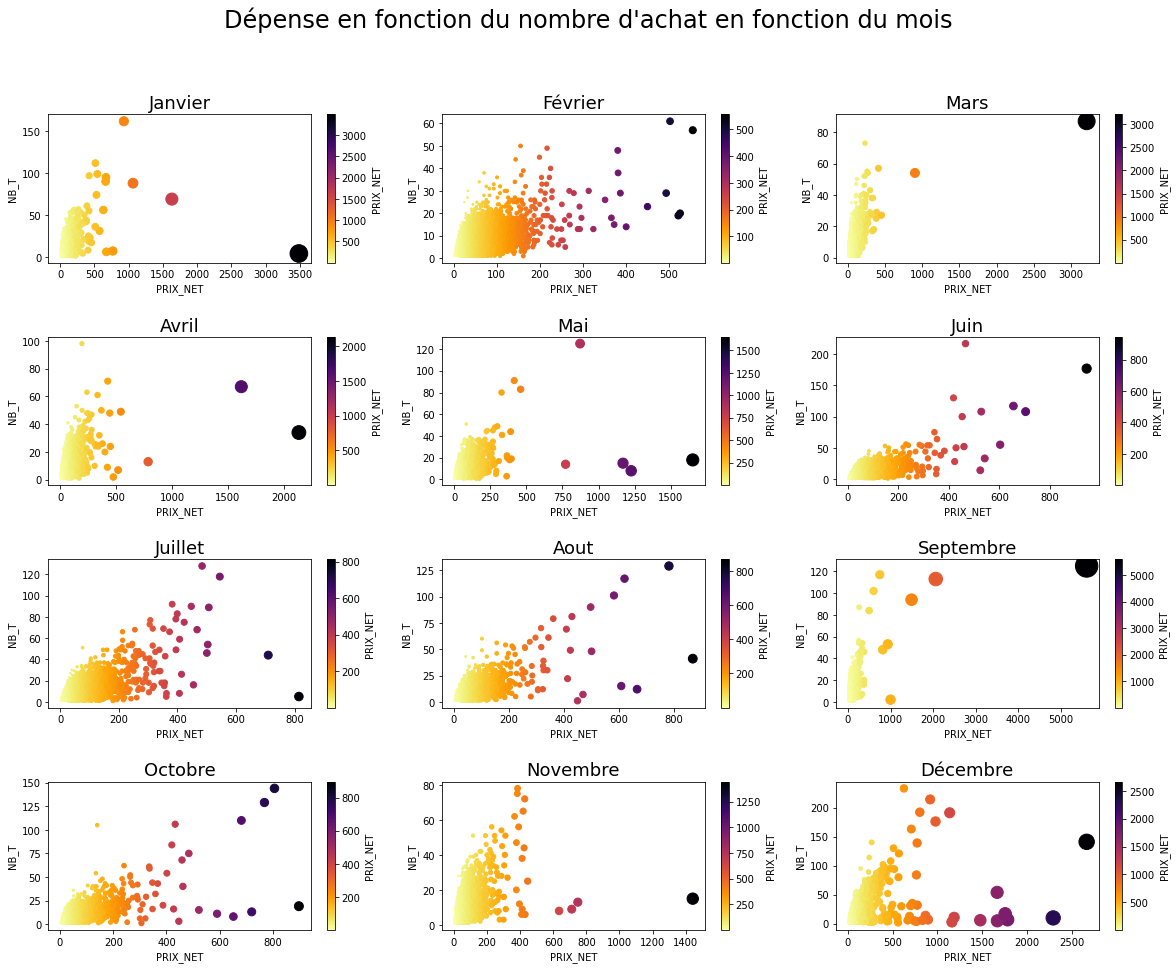

In [19]:
month = range(1, 13)
nrow=4
ncol=3
df_list = []
fig, axes = pplt.subplots(nrow, ncol, figsize=(20,15))
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
count = 0

pplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
fig.suptitle("Dépense en fonction du nombre d'achat en fonction du mois", fontsize=24)
for m in month:
    df_list.append(cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == m])
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(months[i], fontsize=18) # 3
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot.scatter(s="SCALE_PRIX_NET", x="PRIX_NET", y="NB_T", c="PRIX_NET", colormap=reversed_color_map, ax=axes[r,c])
        count += 1

In [20]:
cart_df.tail(10)

PRIX_NET  NB_T
MOIS_VENTE CLI_ID                   
12         997048464     27.00     1
           997048480     60.50     9
           997048498     56.15     9
           997048539     12.80     4
           997048555      5.65     3
           997048563      6.95     2
           997048597    255.90    51
           997048729      7.80     4
           997048769      3.95     1
           997385337     23.80     3

In [21]:
cart_cluster = cart_df.reset_index()
cart_cluster[cart_cluster["MOIS_VENTE"] == 5].head()

,MOIS_VENTE,CLI_ID,PRIX_NET,NB_T
695826,5,20791601,23.80,4
695827,5,21514622,17.90,2
695828,5,69813934,3.75,2
695829,5,85841284,19.85,4
695830,5,100064590,17.85,3


In [22]:
df_cluster = cart_cluster[cart_cluster["MOIS_VENTE"] == 5].filter(['PRIX_NET', 'NB_T'])
df_cluster.head()

,PRIX_NET,NB_T
695826,23.80,4
695827,17.90,2
695828,3.75,2
695829,19.85,4
695830,17.85,3


In [102]:
from sklearn.cluster import KMeans
import numpy as np

nb_cluster = 15

X= df_cluster
kmeans = KMeans(n_clusters=nb_cluster, random_state=0).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[5.23292189e+00 1.72981209e+00 1.42330592e-13]
 [7.81260770e+01 1.12970480e+01 1.00000000e+00]
 [4.59175148e+01 7.48368231e+00 2.00000000e+00]
 [1.67219000e+03 1.78000000e+01 3.00000000e+00]
 [1.84633898e+01 3.89133931e+00 4.00000000e+00]
 [2.43860303e+02 3.59030303e+01 5.00000000e+00]
 [8.47464211e+02 6.97894737e+01 6.00000000e+00]
 [3.52783963e+01 6.02294337e+00 2.53928757e+00]
 [1.04404147e+02 1.41735455e+01 1.00994530e+00]
 [4.38848824e+02 5.82941176e+01 5.58823529e+00]
 [1.50838154e+02 1.98532526e+01 5.00000000e+00]
 [2.48168000e+03 7.55000000e+01 3.00000000e+00]
 [1.16927539e+01 2.88723955e+00 1.40998324e-13]
 [5.95414614e+01 8.81280847e+00 1.66149031e+00]
 [2.62386041e+01 4.65853731e+00 4.00000000e+00]]
[ 7  0 14 ...  0  0 14]


<AxesSubplot:xlabel='PRIX_NET', ylabel='NB_T'>

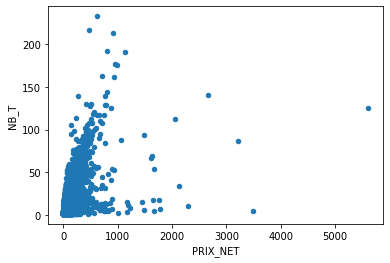

In [103]:
df_to_draw = cart_cluster.copy()
df_to_draw.plot.scatter(x="PRIX_NET", y="NB_T")

In [104]:
month = range(1, 13)
kmean_cluster_centers_list = []
df_list = []
for m in month:
    df_cluster = cart_cluster[cart_cluster["MOIS_VENTE"] == m].filter(['PRIX_NET', 'NB_T'])
    X = df_cluster
    kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
    kmean_cluster_centers_list.append(kmeans.cluster_centers_)
    df_cluster["label"] = kmeans.labels_
    df_list.append(df_cluster)

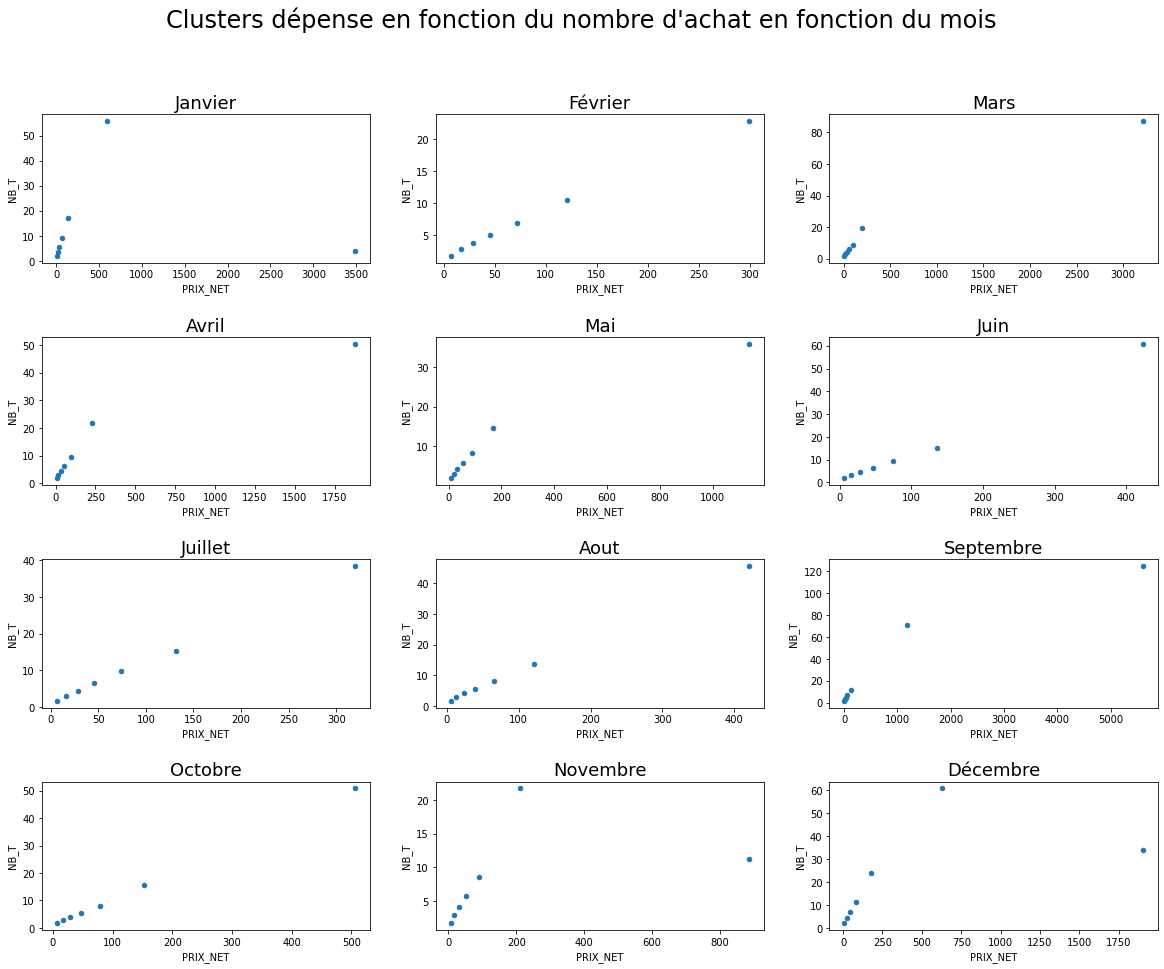

In [105]:

nrow=4
ncol=3
fig, axes = pplt.subplots(nrow, ncol, figsize=(20,15))
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
count = 0

pplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
fig.suptitle("Clusters dépense en fonction du nombre d'achat en fonction du mois", fontsize=24)
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(months[i], fontsize=18) # 3
for r in range(nrow):
    for c in range(ncol):
        df_cluster_point = pd.DataFrame(kmean_cluster_centers_list[count], columns=["PRIX_NET", "NB_T"])
        df_cluster_point.plot.scatter(x="PRIX_NET", y="NB_T", ax=axes[r,c])
        count += 1

In [106]:
import matplotlib.cm as cm


# colors = cm.rainbow(np.linspace(0, 1, nb_cluster))

# colors = cm.jet(np.linspace(0,1,nb_cluster))

# colors = cm.get_cmap('viridis', 12)

color_map = pplt.get_cmap('rainbow', nb_cluster) 
reversed_color_map = color_map.reversed()

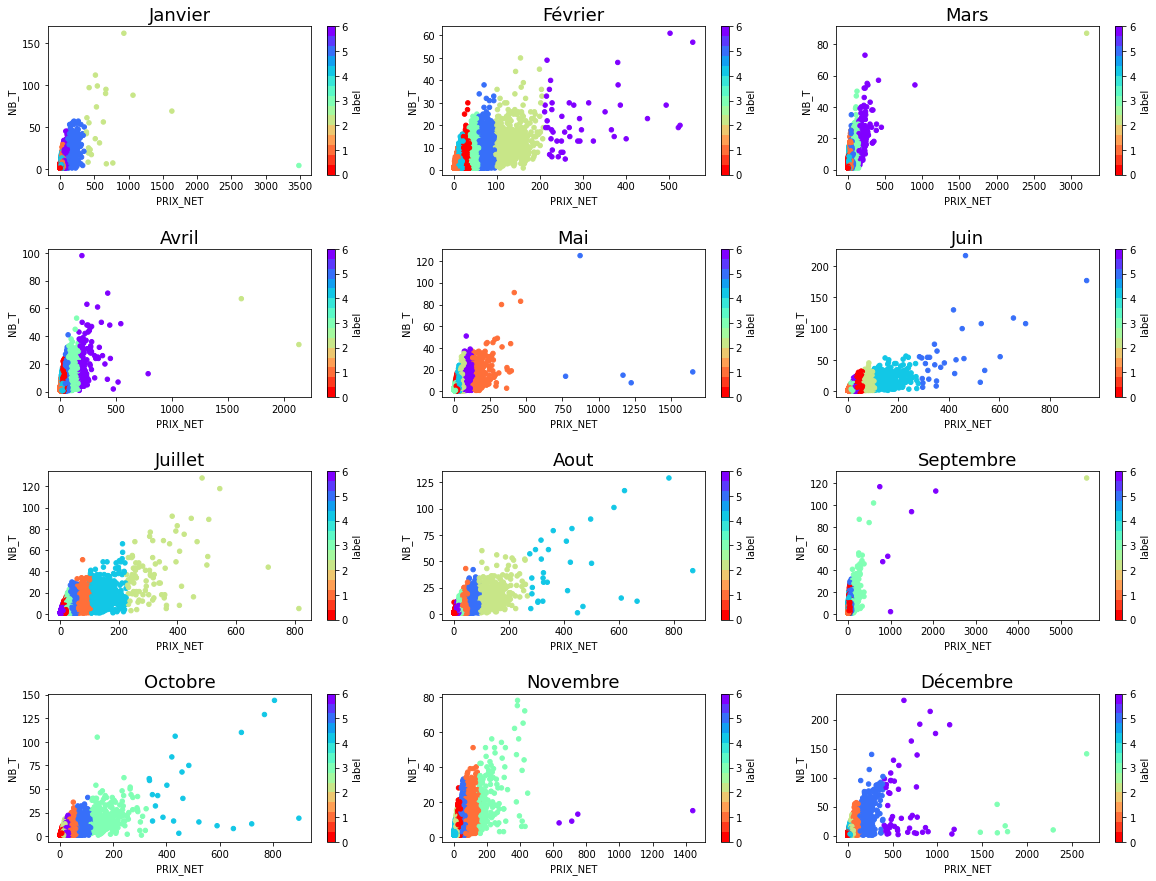

In [107]:
month = range(1, 13)
nrow=4
ncol=3
fig, axes = pplt.subplots(nrow, ncol, figsize=(20,15))
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
count = 0

pplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(months[i], fontsize=18) # 3
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot.scatter(x="PRIX_NET", y="NB_T", c="label", colormap=reversed_color_map, ax=axes[r,c])
        count += 1